In [1]:
!pip3 install --upgrade torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117
!pip install roboflow
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="j2Aozn2a0zL6nrCDAgEo")
project = rf.workspace("zzigmug").project("fruits-and-vegetables-knetf")
dataset = project.version(3).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruits-and-Vegetables-3 in yolov8:: 100%|██████████| 8778/8778 [00:01<00:00, 7618.35it/s]


In [6]:
!cat /content/Fruits-and-Vegetables-3/data.yaml

names:
- apple
- banana
- bell_pepper
- cabbage
- carrot
- chilli_pepper
- corn
- cucumber
- eggplant
- garlic
- grape
- kiwi
- lemon
- lettuce
- mango
- onion
- orange
- pineapple
- potato
- sweetpotato
- tomato
- watermelon
nc: 22
roboflow:
  license: Public Domain
  project: fruits-and-vegetables-knetf
  url: https://universe.roboflow.com/zzigmug/fruits-and-vegetables-knetf/dataset/3
  version: 3
  workspace: zzigmug
test: ../test/images
train: ../train/images
val: ../valid/images


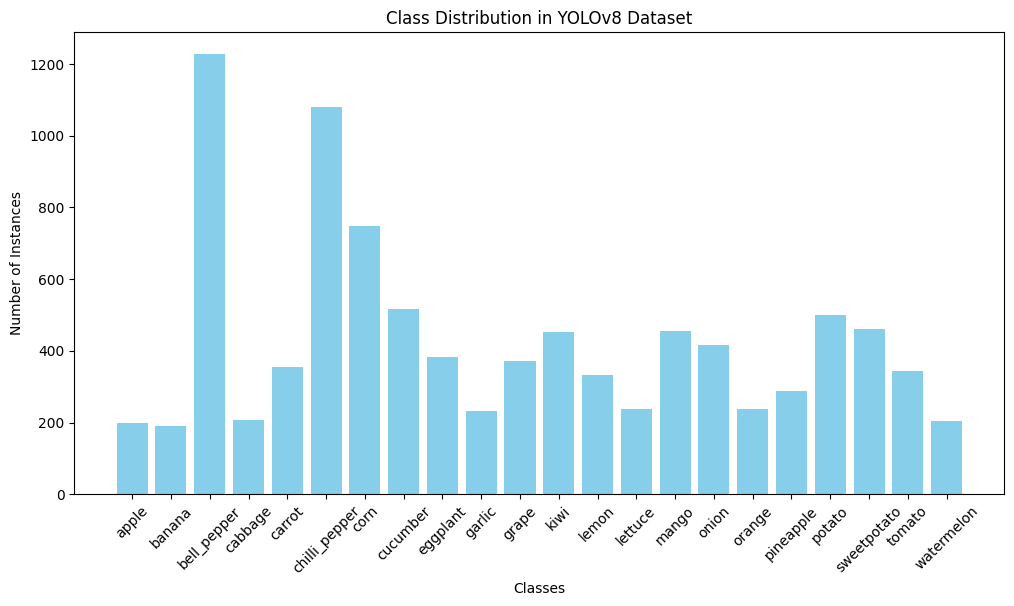

In [7]:
import yaml
import os
import matplotlib.pyplot as plt
from collections import Counter

data_yaml_path = '/content/Fruits-and-Vegetables-3/data.yaml'
with open(data_yaml_path, 'r') as file:
    data_config = yaml.safe_load(file)

class_names = data_config['names']
num_classes = len(class_names)

label_dirs = ['/content/Fruits-and-Vegetables-3/train/labels', '/content/Fruits-and-Vegetables-3/valid/labels', '/content/Fruits-and-Vegetables-3/test/labels']
class_counter = Counter()

for label_dir in label_dirs:
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            file_path = os.path.join(label_dir, label_file)

            with open(file_path, 'r') as f:
                for line in f:
                    class_id = int(line.split()[0])
                    if 0 <= class_id < num_classes:
                        class_counter[class_id] += 1

class_counts = [class_counter[i] for i in range(num_classes)]

plt.figure(figsize=(12, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in YOLOv8 Dataset')
plt.xticks(rotation=45)
plt.show()


In [8]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 42.9 MB/s eta 0:00:00


In [9]:
!yolo task=detect mode=train epochs=50 data=/content/Fruits-and-Vegetables-3/data.yaml model=yolov8m.pt patience=30

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 49.7M/49.7M [00:00<00:00, 358MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Fruits-and-Vegetables-3/data.yaml, epochs=50, time=None, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json

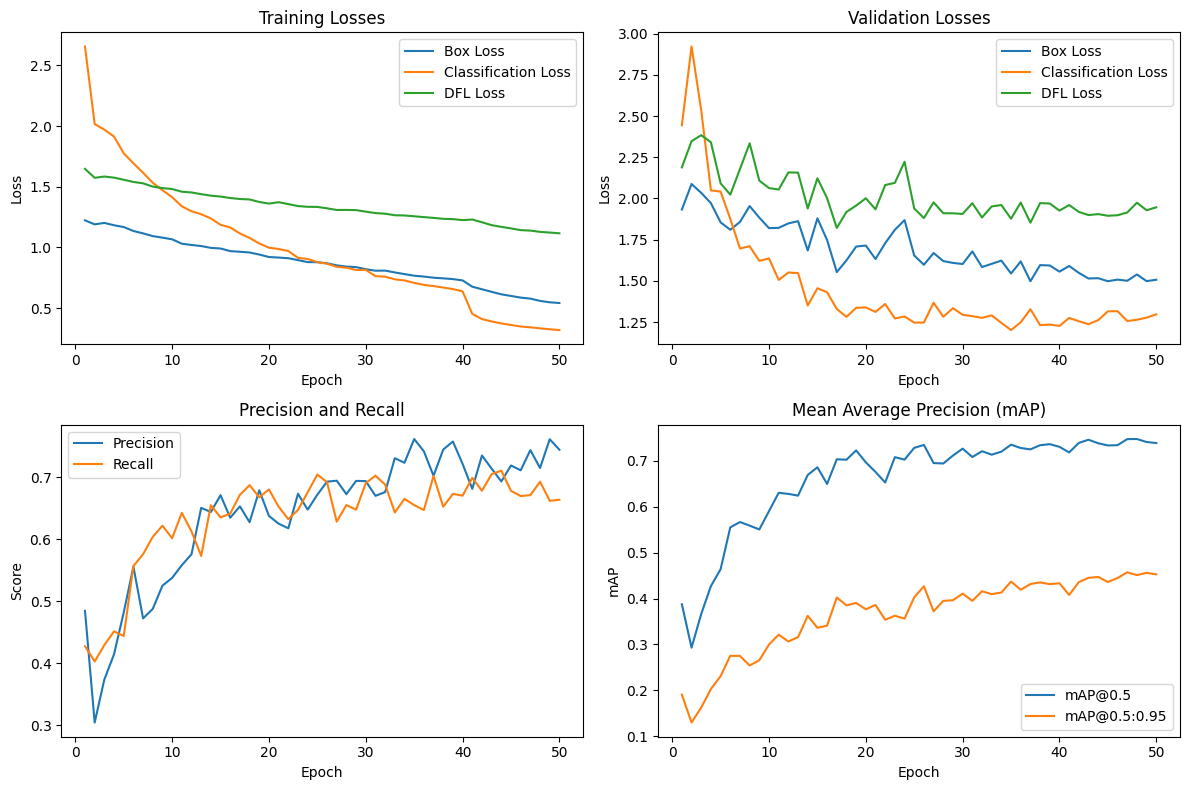

In [12]:
import pandas as pd
metrics = pd.read_csv("/content/runs/detect/train/results.csv")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(metrics['epoch'], metrics['train/box_loss'], label='Box Loss')
plt.plot(metrics['epoch'], metrics['train/cls_loss'], label='Classification Loss')
plt.plot(metrics['epoch'], metrics['train/dfl_loss'], label='DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(metrics['epoch'], metrics['val/box_loss'], label='Box Loss')
plt.plot(metrics['epoch'], metrics['val/cls_loss'], label='Classification Loss')
plt.plot(metrics['epoch'], metrics['val/dfl_loss'], label='DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Losses')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(metrics['epoch'], metrics['metrics/precision(B)'], label='Precision')
plt.plot(metrics['epoch'], metrics['metrics/recall(B)'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(metrics['epoch'], metrics['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(metrics['epoch'], metrics['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Mean Average Precision (mAP)')
plt.legend()

plt.tight_layout()
plt.show()
